# Construindo chatbot de atendimento médico com técnicas tradicionais de machine learning

## Imports

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

### Construindo o dataset para o chatboot médico

In [ ]:
# Dados
from collections import Counter
import random

# Dados fornecidos
data = [
    # Gripe
    ("Quais são os sintomas da gripe?", "gripe", "Os sintomas da gripe incluem febre, dor no corpo, calafrios, dor de garganta e tosse."),
    ("Estou com febre e dor no corpo, é gripe?", "gripe", "Esses sintomas são comuns na gripe. Se você estiver com tosse e dor no corpo também, pode ser a gripe."),
    ("Como saber se estou gripado?", "gripe", "A gripe geralmente apresenta febre, calafrios, dor de cabeça e dor muscular. Se você tiver esses sintomas, é possível que seja gripe."),
    ("Estou com febre alta e dor no corpo, o que pode ser?", "gripe", "Esses sintomas podem ser causados por várias condições, como a gripe ou até a Covid-19. Você já teve contato com alguém que testou positivo para Covid-19 recentemente?"),
    ("Não, mas estou com tosse também.", "gripe", "A tosse junto com febre é uma característica comum da gripe. Recomendo que você procure um médico para uma avaliação mais detalhada."),

    # Cardiologia
    ("Quais os sintomas de um infarto?", "cardiologia", "Os sintomas incluem dor no peito, falta de ar, dor nas costas e suor excessivo."),
    ("Estou com dor no peito e falta de ar, isso pode ser um infarto?", "cardiologia", "Sim, esses podem ser sintomas de infarto. Procure ajuda médica imediatamente."),
    ("Quais exames devo fazer para checar a saúde do coração?", "cardiologia", "Os exames mais comuns incluem o eletrocardiograma (ECG), ecocardiograma e testes de esforço."),
    ("Como posso saber se meu colesterol está alto?", "cardiologia", "Você pode verificar seu colesterol através de um exame de sangue chamado lipidograma, que mede os níveis de colesterol e triglicerídeos."),
    ("Fazer exercícios físicos ajuda a prevenir infarto?", "cardiologia", "Sim, exercícios regulares ajudam a manter o coração saudável e a prevenir doenças cardíacas."),

    # Dermatologia
    ("Como posso tratar acne?", "dermatologia", "A acne pode ser tratada com medicamentos tópicos, como peróxido de benzoíla ou cremes com retinoides."),
    ("Tenho espinhas no rosto, o que devo fazer?", "dermatologia", "Você pode usar cremes específicos para acne e evitar apertar as espinhas. Se necessário, consulte um dermatologista."),
    ("O que causa caspa?", "dermatologia", "A caspa pode ser causada por oleosidade excessiva no couro cabeludo, fungos ou sensibilidade a produtos de higiene."),
    ("Como tratar manchas na pele?", "dermatologia", "Tratamentos com cremes clareadores ou procedimentos como peeling e laser podem ajudar, dependendo do caso."),
    ("Qual é o melhor protetor solar para pele oleosa?", "dermatologia", "Protetores com toque seco e livres de óleo (oil-free) são ideais para pele oleosa."),

    # Saúde mental
    ("O que é depressão?", "saude_mental", "A depressão é um transtorno mental caracterizado por sentimentos persistentes de tristeza, perda de interesse nas atividades diárias e cansaço extremo."),
    ("Quais são os sintomas da depressão?", "saude_mental", "Os sintomas incluem tristeza constante, dificuldade de concentração, insônia ou sono excessivo, e perda de apetite."),
    ("O que é ansiedade?", "saude_mental", "Ansiedade é uma resposta natural ao estresse, mas pode se tornar um transtorno quando é constante e desproporcional."),
    ("Como posso lidar com crises de ansiedade?", "saude_mental", "Técnicas de respiração, mindfulness e psicoterapia são úteis para lidar com crises."),
    ("A terapia ajuda na depressão?", "saude_mental", "Sim, a terapia é uma das principais formas de tratamento para depressão, junto com medicamentos, quando necessários."),

    # Nutrição
    ("Qual a melhor dieta para perder peso?", "nutricao", "Uma dieta balanceada, com controle de calorias e aumento do consumo de vegetais, é eficaz para perda de peso."),
    ("Devo cortar carboidratos para emagrecer?", "nutricao", "Não é necessário cortar carboidratos totalmente. O importante é escolher carboidratos saudáveis e consumi-los com moderação."),
    ("O que comer antes do treino?", "nutricao", "Alimentos ricos em carboidratos e com um pouco de proteína são ideais antes do treino."),
    ("Qual a importância das fibras na dieta?", "nutricao", "As fibras ajudam na digestão, controlam o açúcar no sangue e promovem saciedade."),
    ("Beber água ajuda no emagrecimento?", "nutricao", "Sim, manter-se hidratado auxilia no metabolismo e na saciedade."),

    # Convênios
    ("Vocês aceitam plano de saúde X?", "convenios", "Sim, aceitamos o plano de saúde X. Você pode consultar as coberturas diretamente com nossa recepção."),
    ("Quais planos de saúde vocês aceitam?", "convenios", "Aceitamos planos como Amil, Bradesco Saúde e Unimed. Consulte as condições com a recepção."),
    ("Posso usar meu plano para consultas com especialistas?", "convenios", "Sim, dependendo da cobertura do seu plano. Recomendamos verificar com sua operadora."),
    ("Como faço para saber se meu plano cobre exames?", "convenios", "Você pode verificar isso diretamente com sua operadora ou com nossa equipe de recepção."),
    ("Vocês trabalham com plano empresarial?", "convenios", "Sim, aceitamos convênios empresariais. Consulte as opções disponíveis."),

    # Consultas
    ("Como posso agendar uma consulta?", "consultas", "Você pode agendar sua consulta através do nosso portal online ou entrando em contato com a recepção."),
    ("Preciso levar algum exame para a consulta?", "consultas", "Recomendamos que leve os exames mais recentes, caso tenha algum, para facilitar a avaliação do médico."),
    ("Qual o horário de funcionamento para consultas?", "consultas", "Atendemos de segunda a sexta, das 8h às 18h. Sábados até às 12h."),
    ("Posso remarcar minha consulta?", "consultas", "Sim, é possível remarcar sua consulta com pelo menos 24 horas de antecedência."),
    ("Consultas de retorno são cobradas?", "consultas", "Geralmente não, se forem feitas dentro do prazo estabelecido pelo médico. Consulte as regras com a recepção."),

    # Ortopedia
    ("Qual o melhor tratamento para dor nas costas?", "ortopedia", "O tratamento pode incluir fisioterapia, medicamentos anti-inflamatórios e, em alguns casos, cirurgia."),
    ("Estou com dor nas costas, o que pode ser?", "ortopedia", "A dor nas costas pode ser causada por tensão muscular, problemas na coluna ou até uma hérnia. É importante procurar um médico para diagnóstico."),
    ("Como saber se a dor nas costas é grave?", "ortopedia", "A dor nas costas pode ser grave se for acompanhada de dormência, fraqueza nas pernas ou dificuldade de movimentação. Caso esses sintomas apareçam, procure um médico imediatamente."),
    ("O que é hérnia de disco?", "ortopedia", "É uma lesão nos discos intervertebrais que pode causar dor e compressão dos nervos da coluna."),
    ("Exercícios físicos ajudam na dor lombar?", "ortopedia", "Sim, exercícios orientados por um profissional ajudam no fortalecimento e alívio da dor."),

    # Neurologia
    ("Estou com muita dor de cabeça, o que posso fazer?", "neurologia", "Se a dor de cabeça for muito forte e persistir, pode ser sinal de enxaqueca ou outro problema. Tente descansar em um local tranquilo e tomar um analgésico, mas se persistir, consulte um médico."),
    ("O que é enxaqueca?", "neurologia", "É uma dor de cabeça intensa, geralmente em um dos lados, que pode vir acompanhada de náuseas e sensibilidade à luz."),
    ("Quais são os sintomas de um AVC?", "neurologia", "Fraqueza em um lado do corpo, dificuldade de fala e perda de visão são sintomas comuns de AVC."),
    ("Quando devo procurar um neurologista?", "neurologia", "Se tiver dores de cabeça frequentes, formigamentos, desmaios ou crises convulsivas."),
    ("Existe tratamento para epilepsia?", "neurologia", "Sim, há medicamentos anticonvulsivantes e outras abordagens que ajudam a controlar as crises.")
]

# Contar ocorrências por categoria
counts = Counter([x[1] for x in data])
max_count = max(counts.values())

# Balancear por oversampling
balanced_data = []
category_groups = {}

for pergunta, categoria, resposta in data:
    category_groups.setdefault(categoria, []).append((pergunta, categoria, resposta))

for categoria, items in category_groups.items():
    if len(items) < max_count:
        needed = max_count - len(items)
        sampled = random.choices(items, k=needed)
        items.extend(sampled)
    balanced_data.extend(items)

# Contagem após balanceamento
Counter([x[1] for x in balanced_data])


# Criando o DataFrame
df = pd.DataFrame(data, columns=["Pergunta", "Categoria", "Resposta"])

# Salvando o dataset em um .csv
df.to_csv('../data/processed/nlp_chatbot_dataset.csv')

### Lendo o dataset criado

In [42]:
df = pd.read_csv('../data/processed/nlp_chatbot_dataset.csv').drop('Unnamed: 0', axis=1)
df.head()

,Pergunta,Categoria,Resposta
0,Quais são os sintomas da gripe?,gripe,"Os sintomas da gripe incluem febre, dor no cor..."
1,"Estou com febre e dor no corpo, é gripe?",gripe,Esses sintomas são comuns na gripe. Se você es...
2,Como saber se estou gripado?,gripe,"A gripe geralmente apresenta febre, calafrios,..."
3,Quais os sintomas de um infarto?,cardiologia,"Os sintomas incluem dor no peito, falta de ar,..."
4,"Estou com dor no peito e falta de ar, isso pod...",cardiologia,"Sim, esses podem ser sintomas de infarto. Proc..."


## Explorando o dataset

### Colunas

In [43]:
df.columns

Index(['Pergunta', 'Categoria', 'Resposta'], dtype='object')

### Dimensões

In [44]:
df.shape

(23, 3)

### Verificando existência de valores nulos

In [45]:
df.isna().sum()

Pergunta     0
Categoria    0
Resposta     0
dtype: int64

### Quantidade de caracteres para cada variável (pergunta, categoria e reposta)

In [46]:
df['caracteres_pergunta'] = df.Pergunta.apply(lambda x: len(x))
df['caracteres_categoria'] = df.Categoria.apply(lambda x: len(x))
df['caracteres_resposta'] = df.Resposta.apply(lambda x: len(x))

df

,Pergunta,Categoria,Resposta,caracteres_pergunta,caracteres_categoria,caracteres_resposta
0,Quais são os sintomas da gripe?,gripe,"Os sintomas da gripe incluem febre, dor no cor...",31,5,85
1,"Estou com febre e dor no corpo, é gripe?",gripe,Esses sintomas são comuns na gripe. Se você es...,40,5,102
2,Como saber se estou gripado?,gripe,"A gripe geralmente apresenta febre, calafrios,...",28,5,133
3,Quais os sintomas de um infarto?,cardiologia,"Os sintomas incluem dor no peito, falta de ar,...",32,11,79
4,"Estou com dor no peito e falta de ar, isso pod...",cardiologia,"Sim, esses podem ser sintomas de infarto. Proc...",63,11,77
5,Como posso tratar acne?,dermatologia,A acne pode ser tratada com medicamentos tópic...,23,12,101
6,"Tenho espinhas no rosto, o que devo fazer?",dermatologia,Você pode usar cremes específicos para acne e ...,42,12,116
7,O que é depressão?,saude_mental,A depressão é um transtorno mental caracteriza...,18,12,151
8,Quais são os sintomas da depressão?,saude_mental,"Os sintomas incluem tristeza constante, dificu...",35,12,115
9,Qual a melhor dieta para perder peso?,nutricao,"Uma dieta balanceada, com controle de calorias...",37,8,109


### Distribuição das categorias

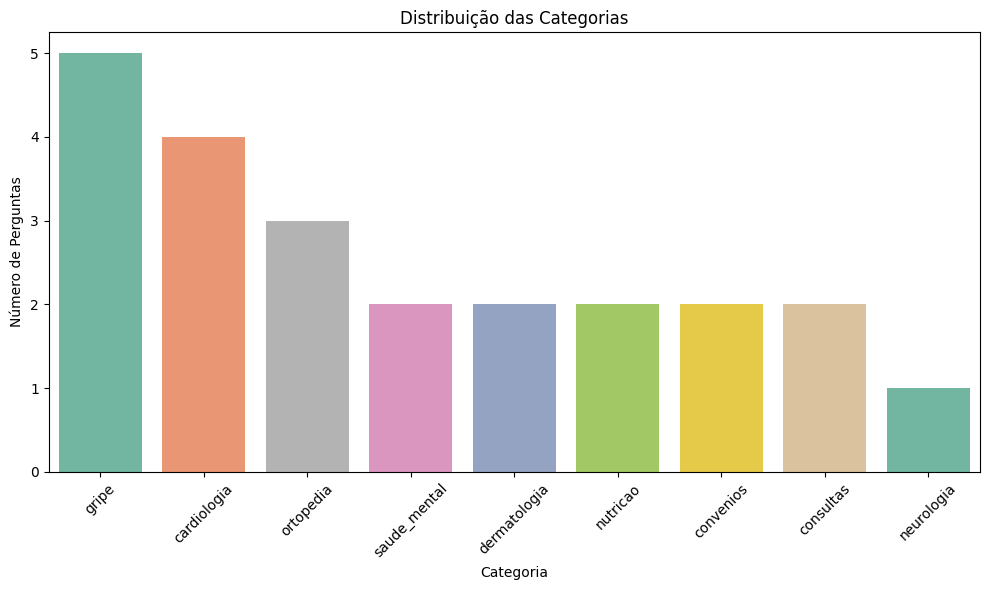

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='Categoria',
    hue='Categoria',
    order=df['Categoria'].value_counts().index,
    palette='Set2',
    legend=False
)
plt.title('Distribuição das Categorias')
plt.xlabel('Categoria')
plt.ylabel('Número de Perguntas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
df.Categoria.value_counts()

Categoria
gripe           5
cardiologia     4
ortopedia       3
saude_mental    2
dermatologia    2
nutricao        2
convenios       2
consultas       2
neurologia      1
Name: count, dtype: int64